In [1]:
import utils_adder

import numpy as np 
import pandas as pd 
import glob


import data_convertor, processing 

In [2]:
# Piezo dataset 

path = '../data/piezo/00_indoor_normal_cond.dat'

def load_data(path):
    data = pd.DataFrame(np.loadtxt(path,  unpack = True).T , columns=['Ts', 'N.A', 'Velocity', 'CH0', 'CH1'])
    #data = [np.loadtxt(f,  unpack = True) for f in glob.glob(path + "*.dat")]
    return data

indoor_data = load_data(path= path)
#l_df = {p.split('/')[-1].split('.')[0] : pd.read_csv(p, sep=" ", header=None) for p in glob.glob(path + "*.TXT")} 
#l_df = [pd.read_csv(p, sep=" ", header=None) for p in glob.glob(path + "*.TXT")]

In [ ]:
# txt to csv Conversion 
path = '../data/berkely/00_indoor_noraml_cond/'

for i in range(0,21):
    logger = i
    l_df = data_convertor.read_txt(path=path, label=0, log_num = logger)
    data_convertor.from_df_to_csv(l_df, path, logger)

In [3]:
# Concatanating csv logs and validate them 

#path = '../data/berkely/00_outdoor_normal_cond_220622/'
path = '../data/berkely/00_indoor_noraml_cond/'
ldf = [pd.read_csv(p) for p in glob.glob(path + "*.csv")]
df_fino = pd.concat(ldf).sort_values(by=['logger', 'ts'])

#df_uno = pd.read_csv(path+"LOG0001.csv")



In [3]:
# Here Mean Center + Convert to [g] 
df_fino

,x,y,cond,logger,ts
0,541.0,841.0,0.0,0.0,0.00
1,541.0,841.0,0.0,0.0,0.01
2,541.0,841.0,0.0,0.0,0.02
3,541.0,841.0,0.0,0.0,0.03
4,541.0,841.0,0.0,0.0,0.04
...,...,...,...,...,...
31495,535.0,940.0,0.0,20.0,314.95
31496,534.0,940.0,0.0,20.0,314.96
31497,539.0,943.0,0.0,20.0,314.97
31498,552.0,928.0,0.0,20.0,314.98


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt 
conv = 2/(2**15) 
plt.figure()
plt.plot(df_fino.x.values*conv  - np.mean(df_fino.x.values*conv))
plt.plot(indoor_data.CH1)
plt.show()

In [8]:
(df_fino.x.values.shape[0])

661500

In [20]:
conv = 2/(2**15) 
fft_berk = processing.fft_(df_fino.y.values*conv, 104)  
fft_piezo = processing.fft_(indoor_data.CH0.values, 100)

(0.0, 8e-05)

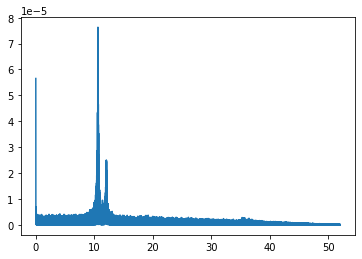

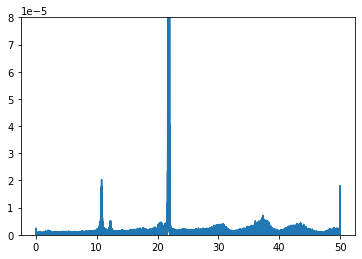

In [22]:
import matplotlib.pyplot as plt 
plt.figure()

plt.plot(fft_berk['frequency'], fft_berk['fft_'])
#plt.xlim([0,15])

plt.figure()
plt.plot(fft_piezo['frequency'], fft_piezo['fft_'])

#plt.xlim([0,15])
plt.ylim([0,float(8e-5)])

#### for 00_indoor_noraml_cond: <br />
    - CH0 == y-axis f_peak = 10.23 
    - CH1 == x-axis f_peak = 2.85, 8.xx
 

In [ ]:
# Modify the dataFrames to be totally similar 

# Store the Datasets in the csv format in a separate format ... 
